Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [ ]:
%matplotlib inline
import importer
import chap01soln
resp = chap01soln.ReadFemResp(dct_file='../code/2002FemResp.dct',
                dat_file='../code/2002FemResp.dat.gz')

# Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [2]:
import thinkstats2
pmf = thinkstats2.Pmf(resp.numkdhh)

Display the PMF.

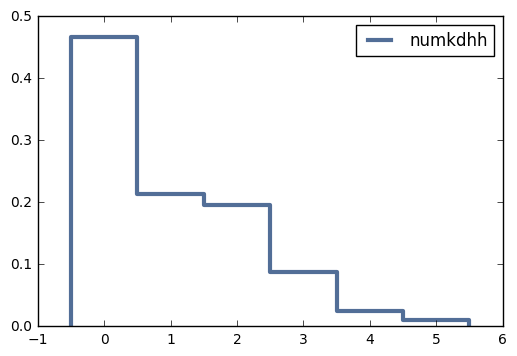

In [5]:
import thinkplot
thinkplot.Pmf(pmf, label='numkdhh')
thinkplot.Show()

Define <tt>BiasPmf</tt>.

In [6]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [7]:
biased = BiasPmf(pmf, label='biased')

Display the actual Pmf and the biased Pmf on the same axes.

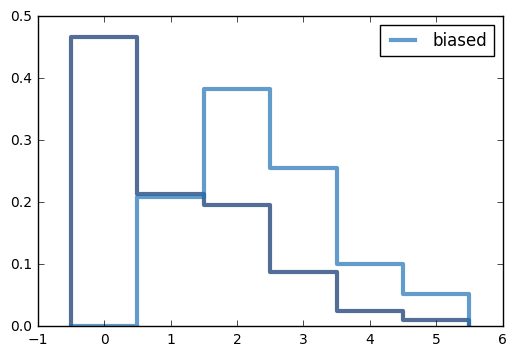

In [8]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Show()

Compute the means of the two Pmfs.

In [9]:
pmf.Mean()

1.0242051550438309

In [10]:
biased.Mean()

2.4036791006642821

In [11]:
biased.Mean()/pmf.Mean(),biased.Mean() - pmf.Mean()

(2.3468726834922213, 1.3794739456204512)